**KNN**

1.Data Exploration and Preprocessing:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/Zoo.csv')

In [5]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
print(df.head())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [7]:
print(df.tail())

    animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
96         1     1  
97         0     6  
98         1     1  
99         0  

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [9]:
print(df.shape)

(101, 18)


In [10]:
print(df.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [11]:
# Data Types
df.dtypes

,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


In [12]:
# Check for missing values again after potential imputation or removal
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [13]:
# Imputation methods (choose one or combine)
# 1. Mean/Median/Mode imputation for numerical features
for col in df.select_dtypes(include=np.number):
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

In [14]:
# Improved handling of missing values
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            # Numerical features: Impute with the median (more robust to outliers)
            df[col] = df[col].fillna(df[col].median())
        elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
            # Categorical features: Impute with the mode or a specific category
            df[col] = df[col].fillna(df[col].mode()[0])  # Use the most frequent value
        else:
            # For other data types or if you want a different strategy
            print(f"Column '{col}' has missing values and is not numeric or categorical. Consider a different imputation method.")

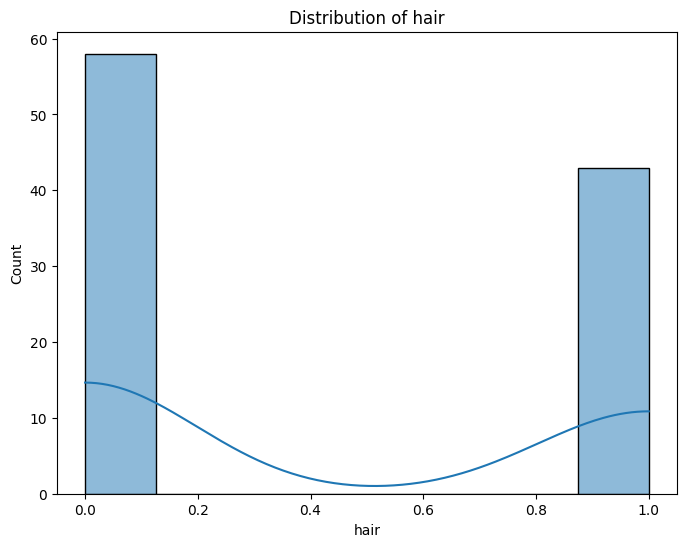

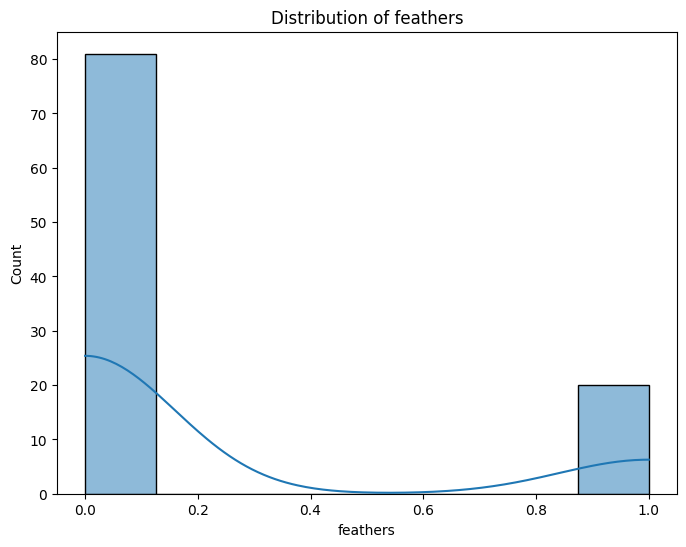

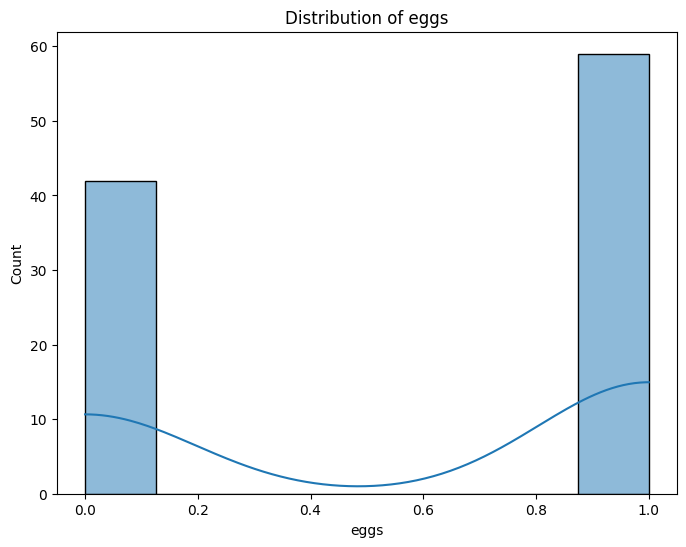

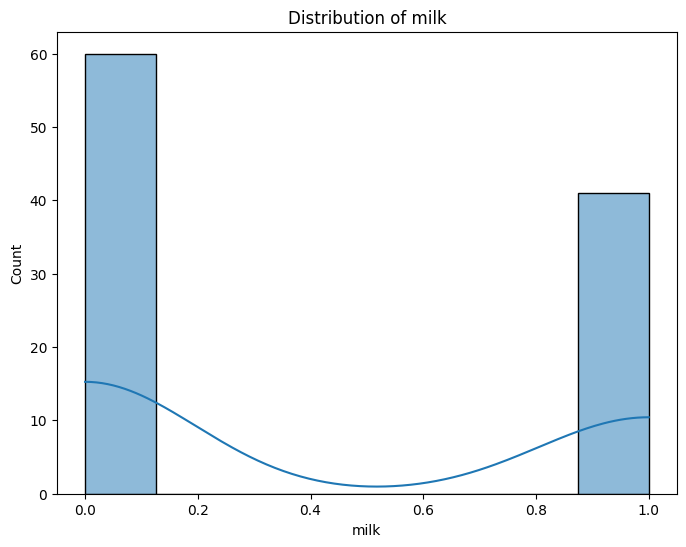

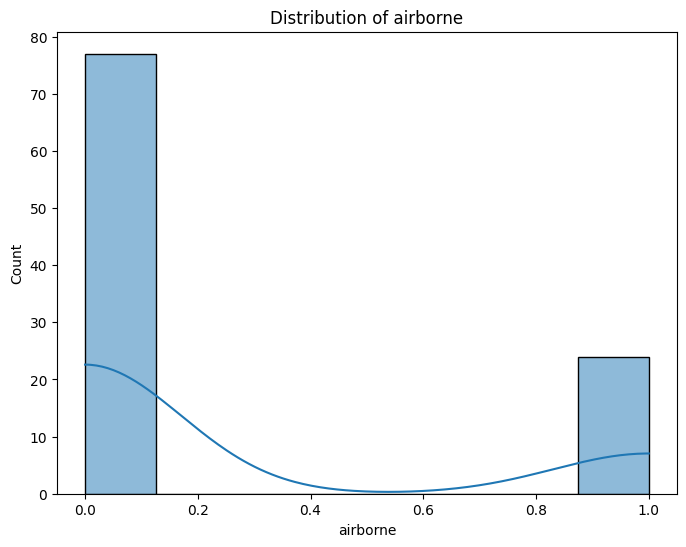

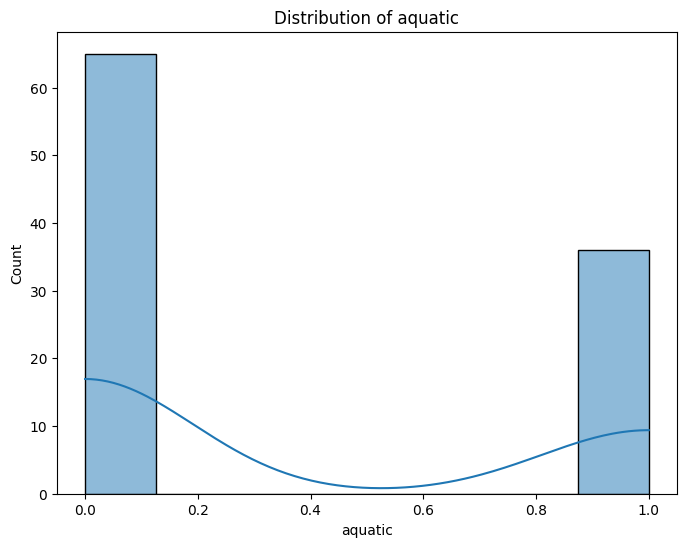

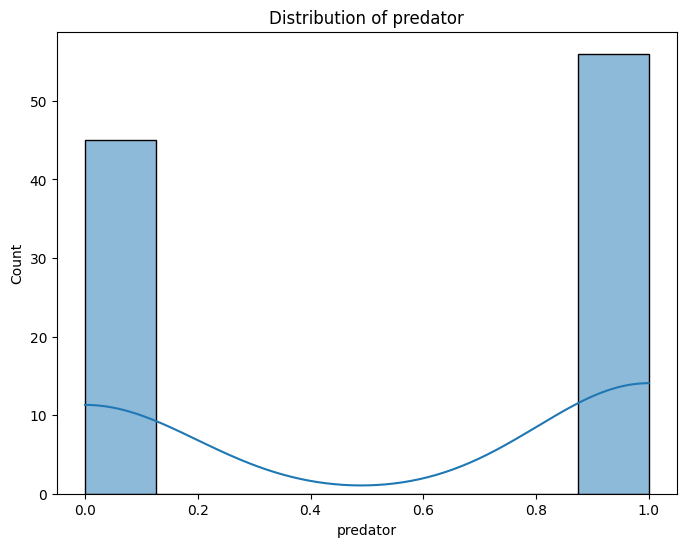

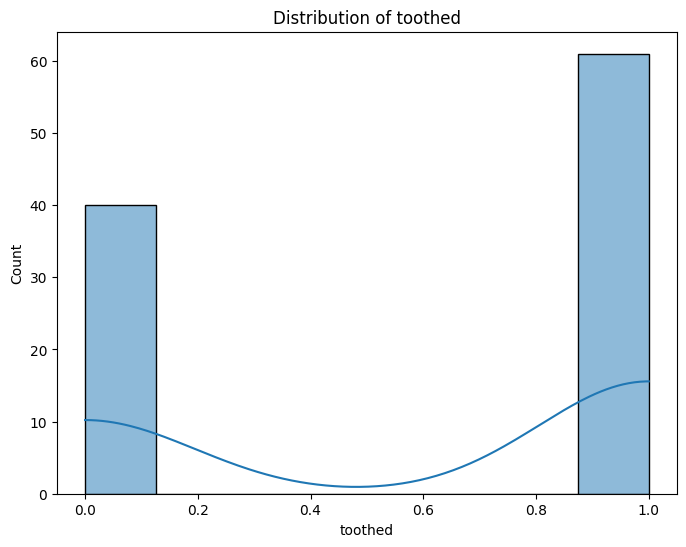

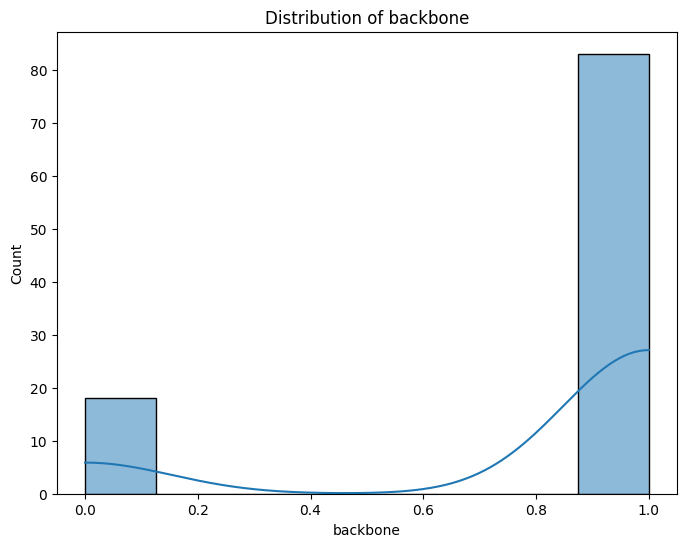

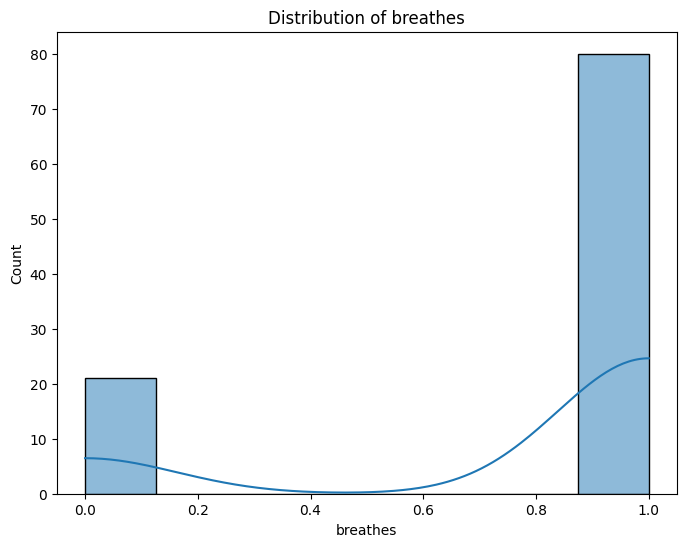

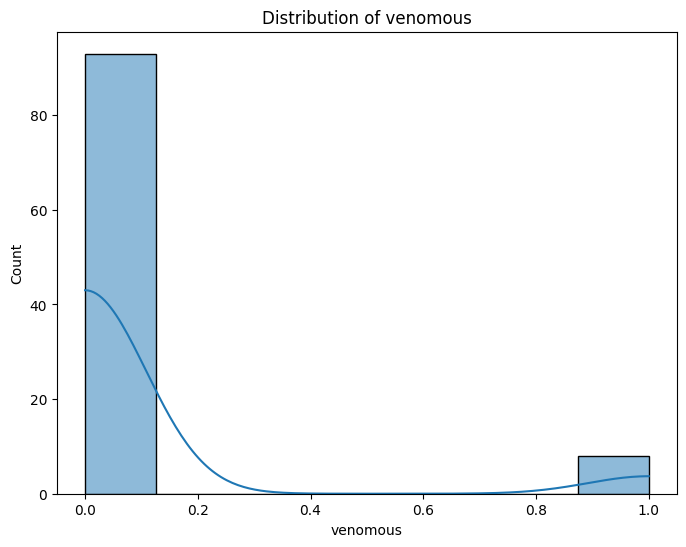

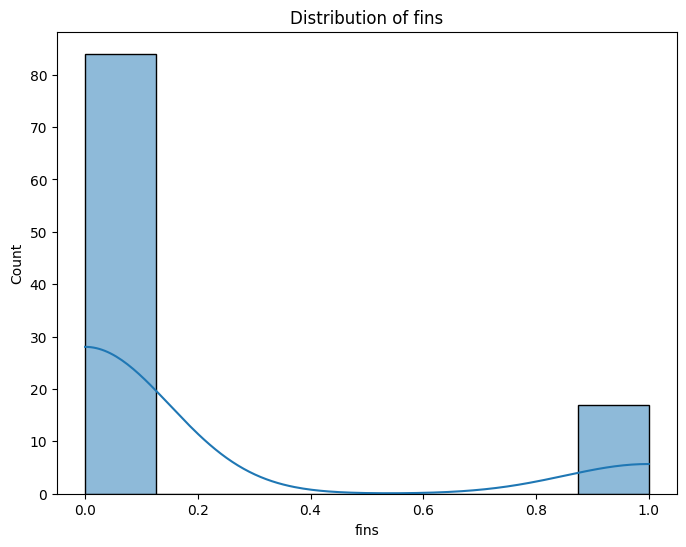

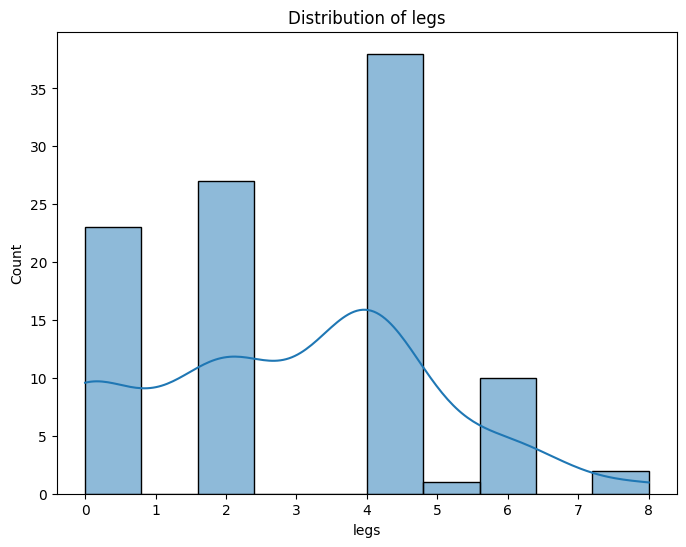

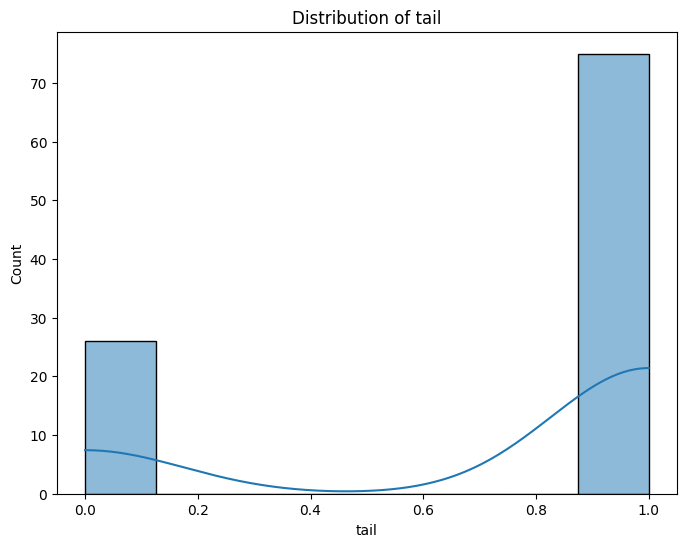

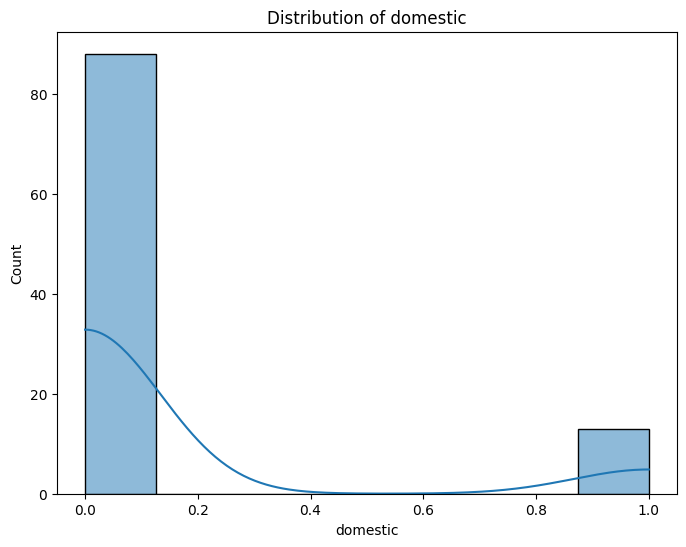

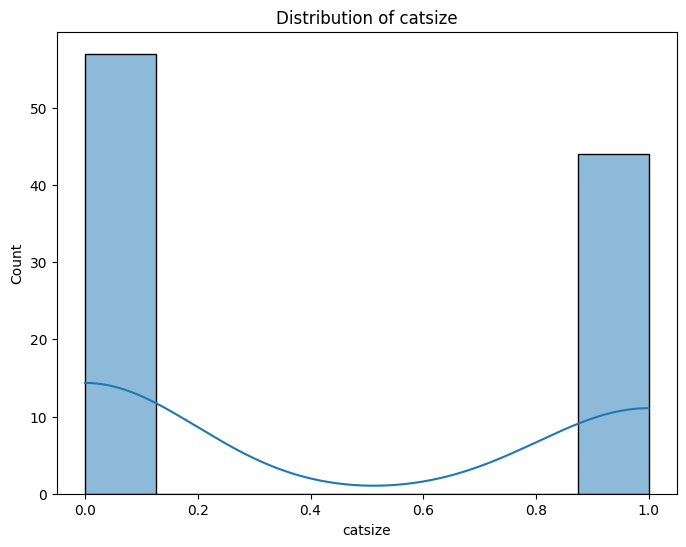

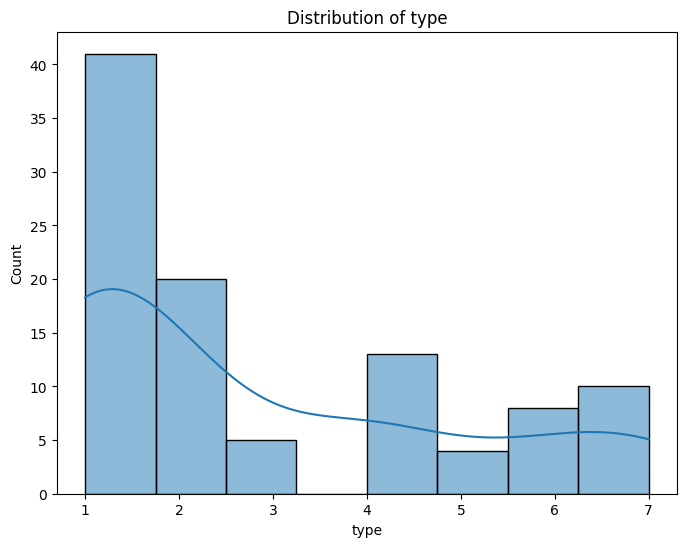

In [16]:
# Histograms for numerical features
# Get numerical columns dynamically
numerical_columns = df.select_dtypes(include=np.number).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

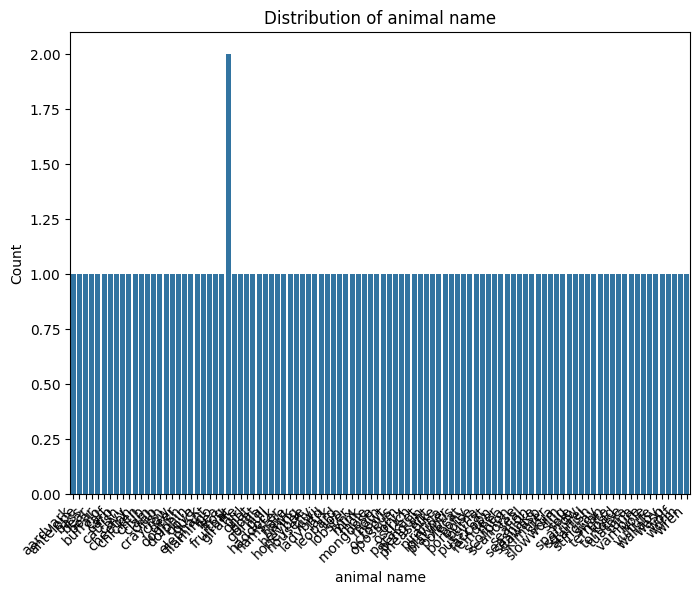

In [18]:
# 2. Categorical Feature Analysis (Bar Plots or Countplots)
# Get categorical columns dynamically
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if needed
    plt.show()

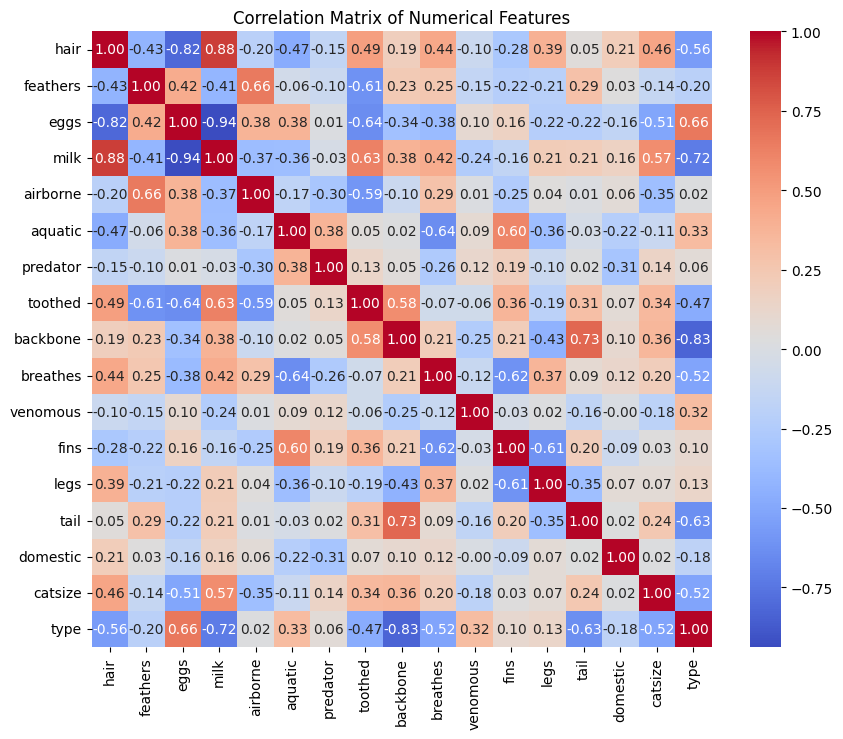

In [19]:
# 3. Correlation Analysis (Heatmap)
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

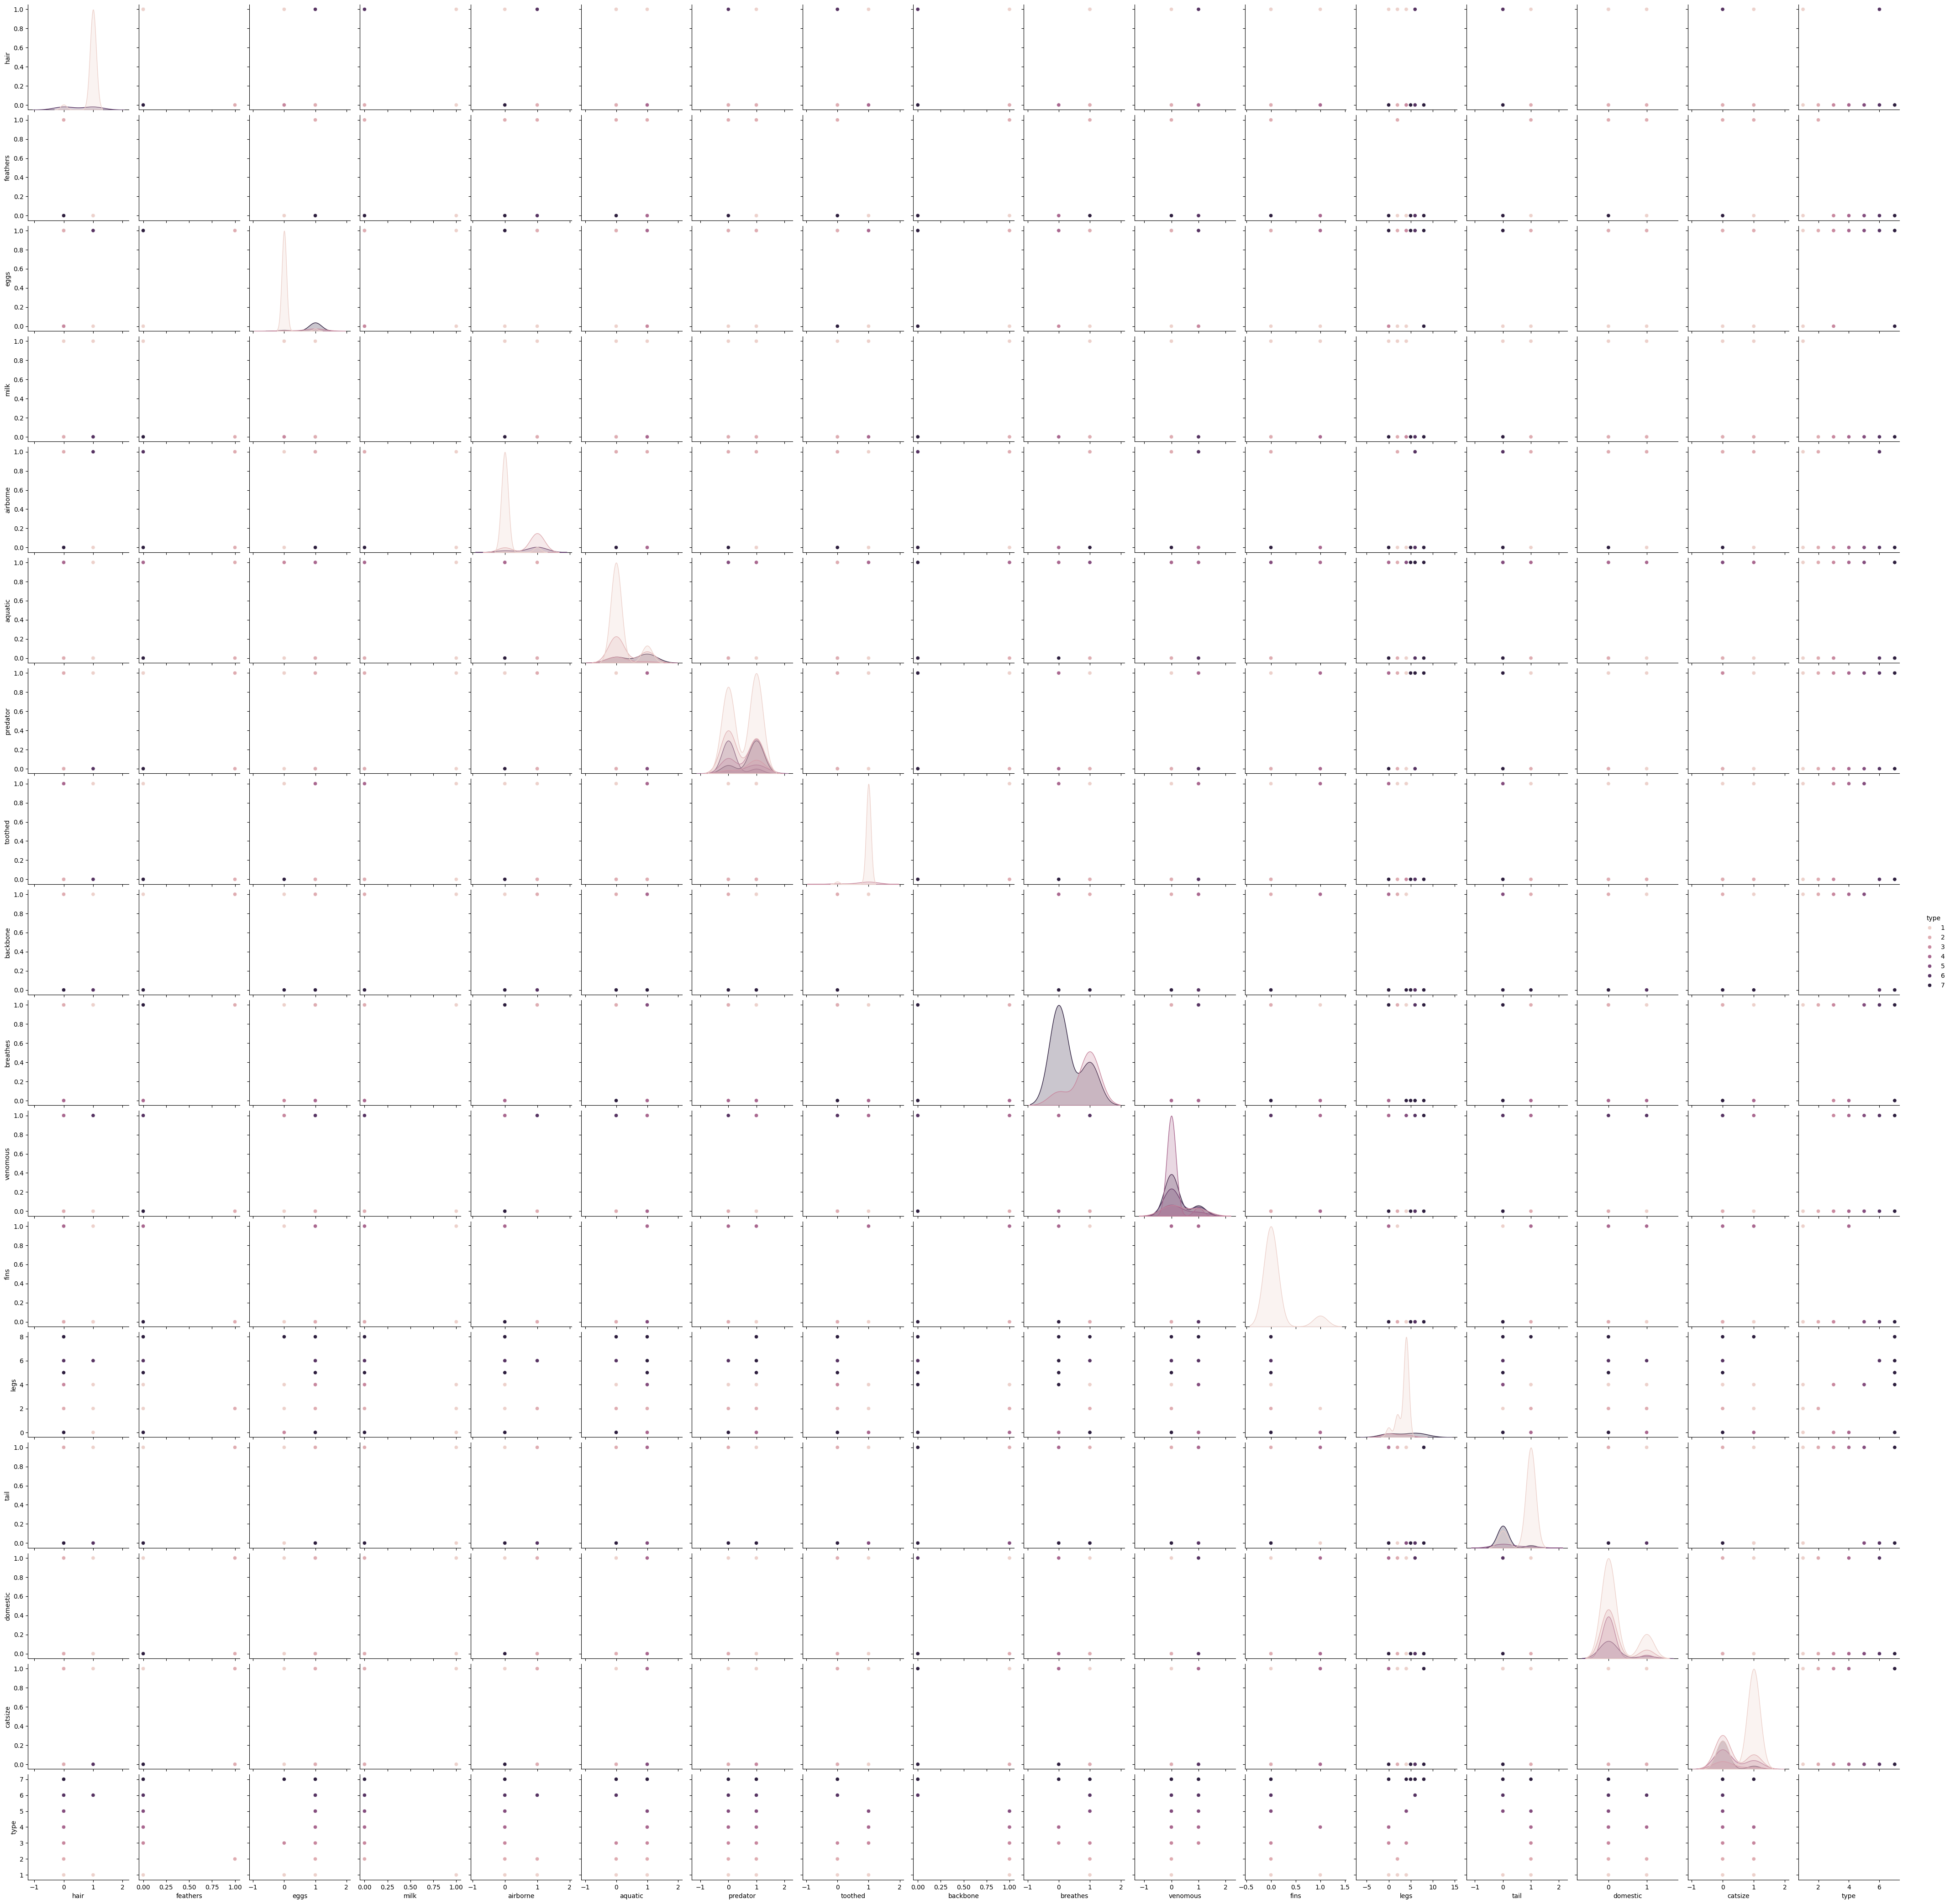

In [22]:
# 4. Pair Plots (Scatter plots for all numerical feature pairs)
sns.pairplot(df, hue='type', vars=numerical_columns) # Use numerical_columns directly
plt.show()

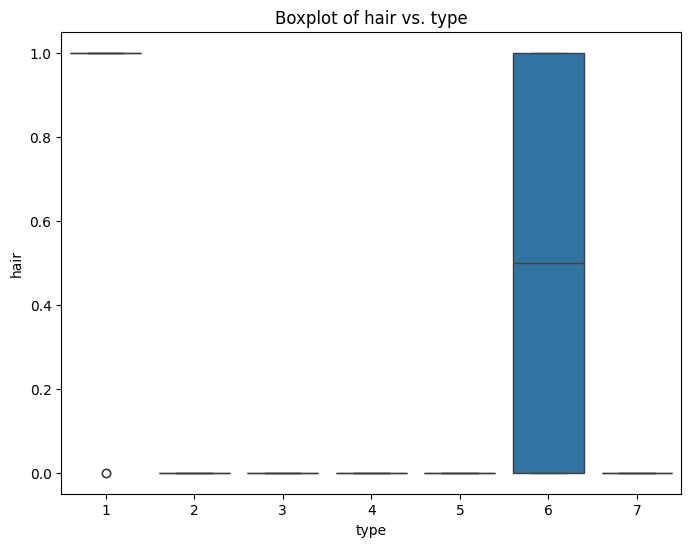

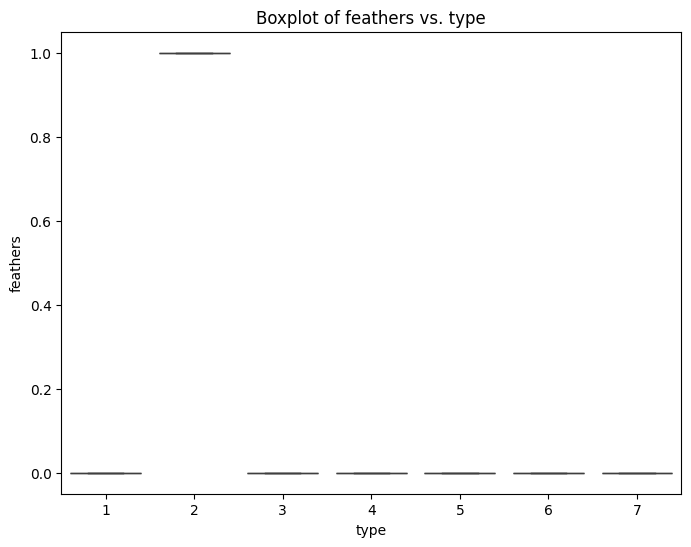

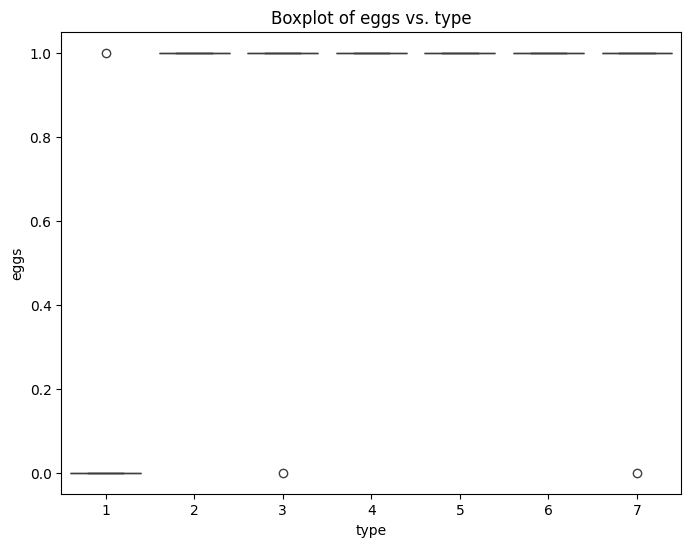

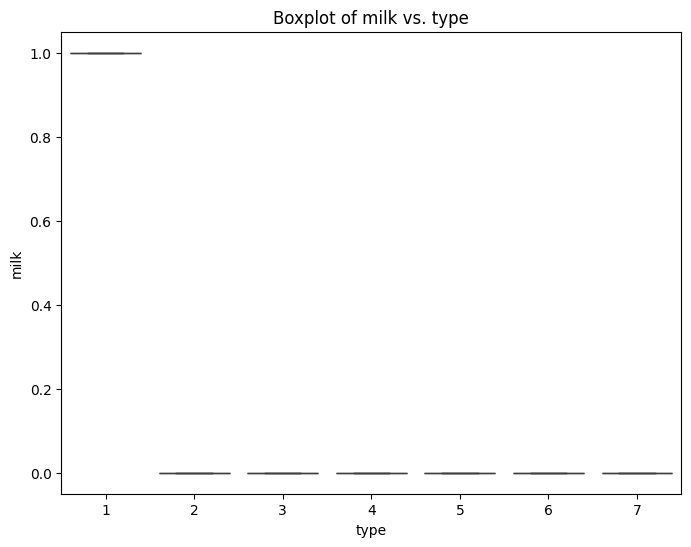

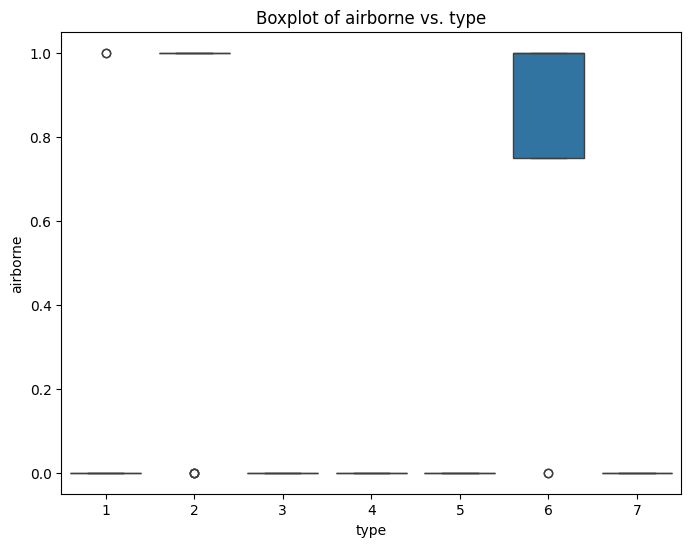

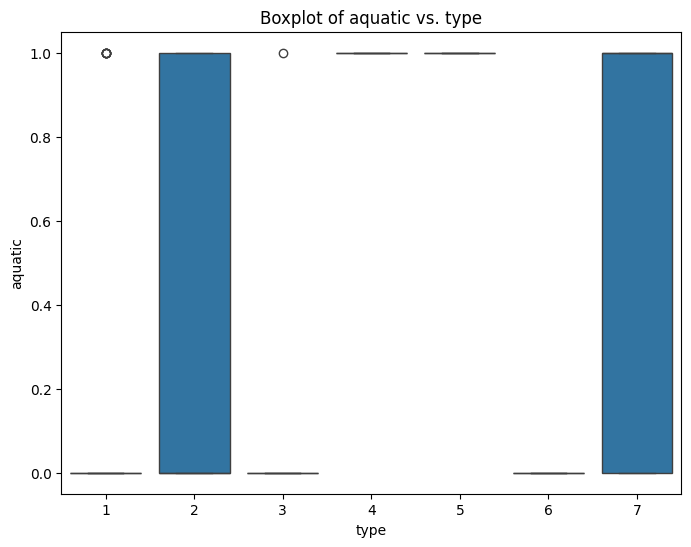

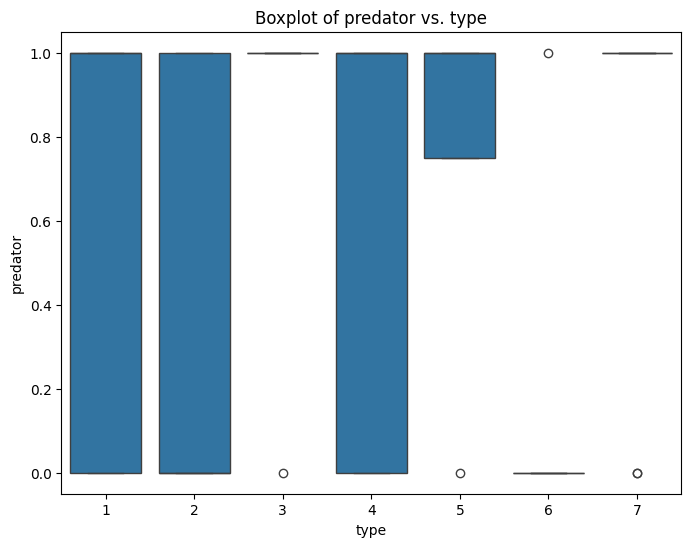

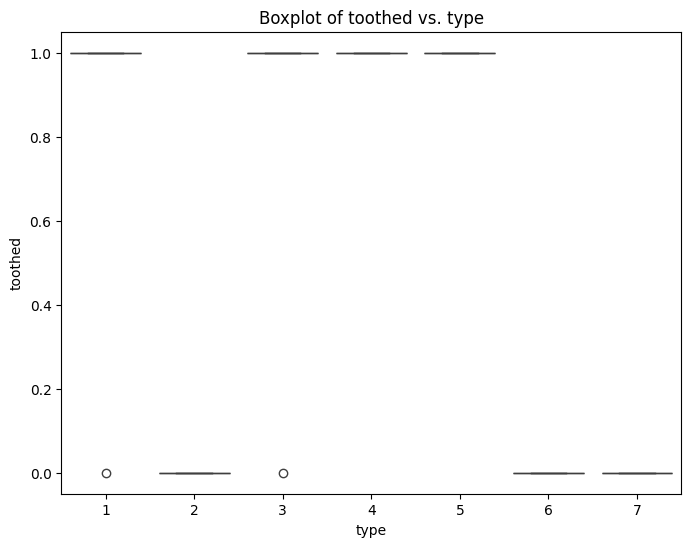

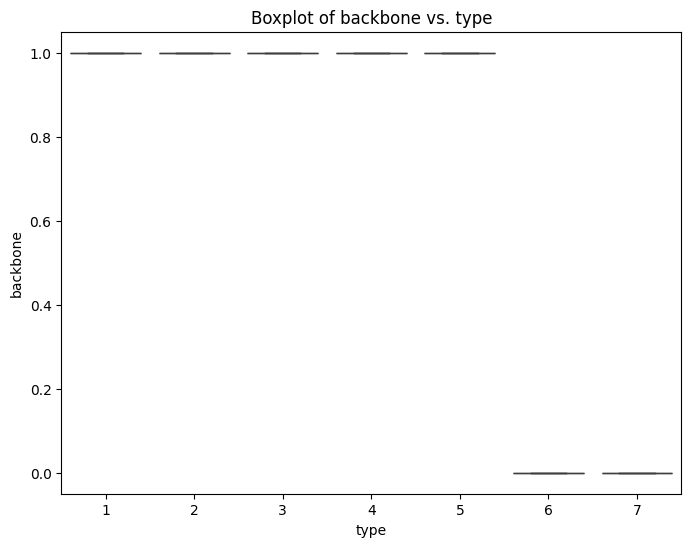

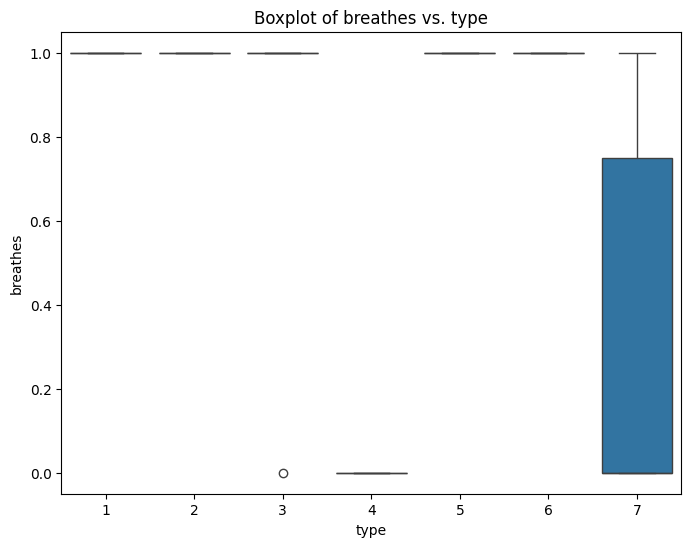

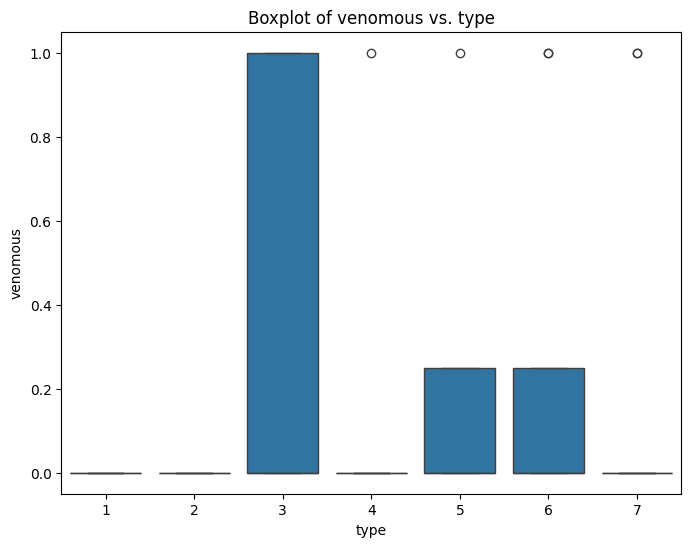

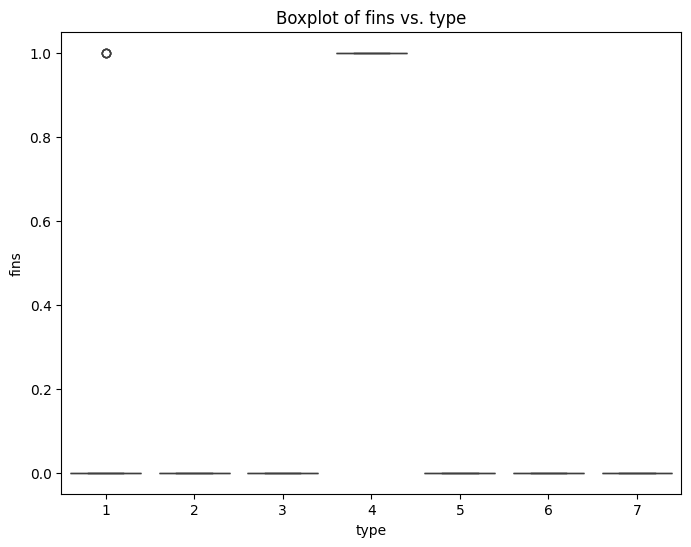

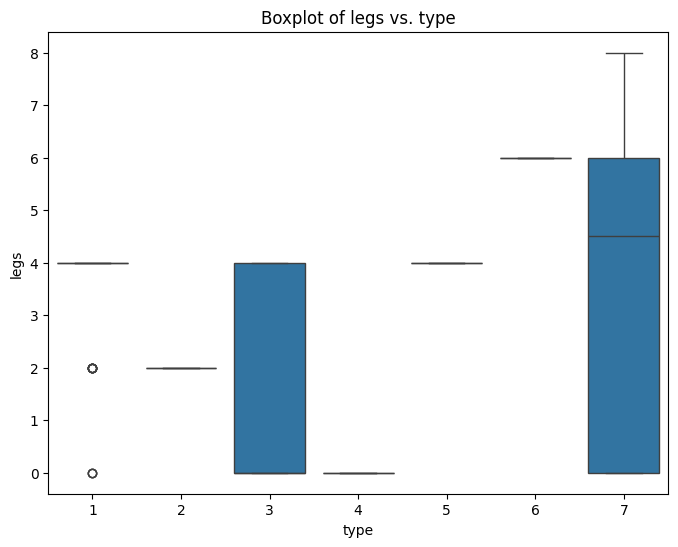

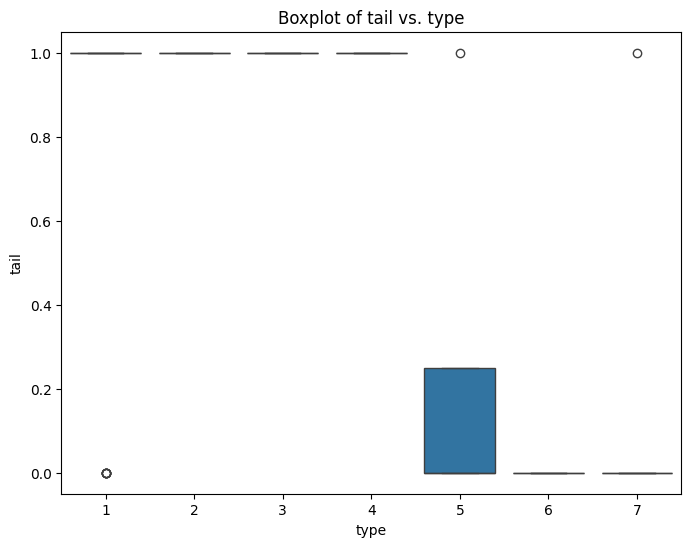

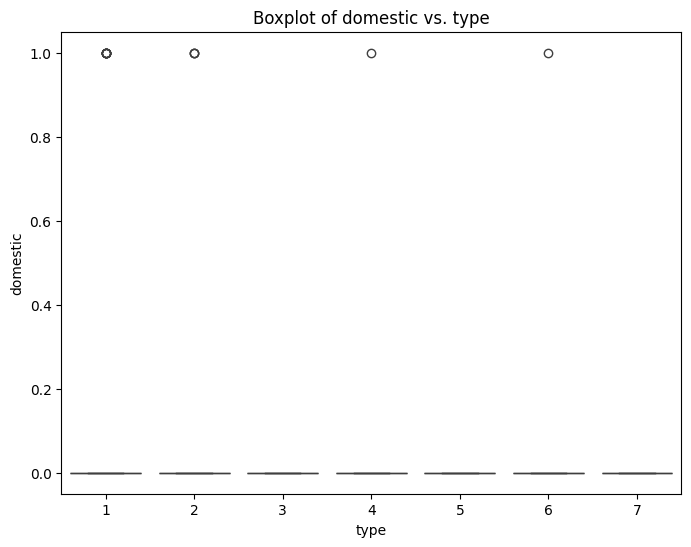

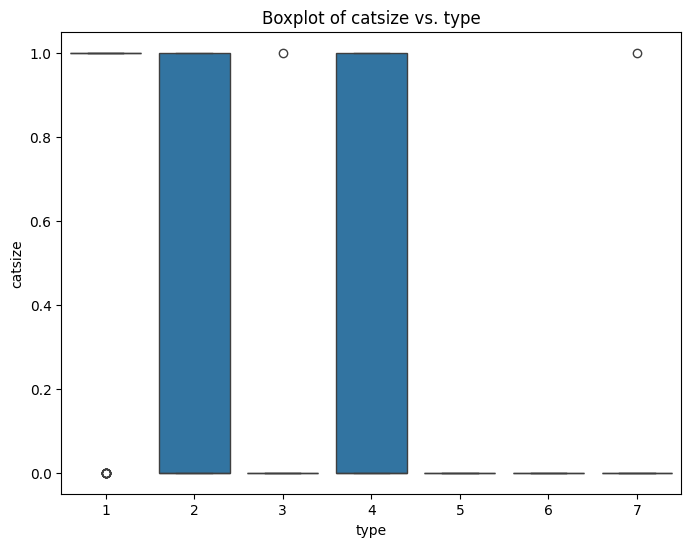

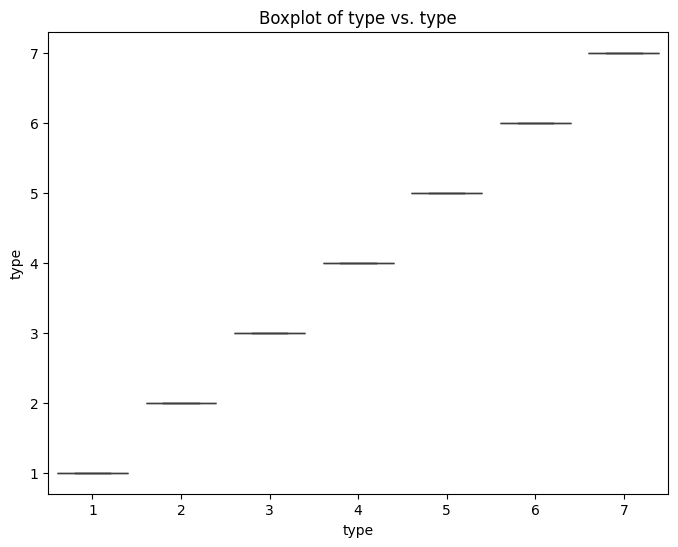

In [24]:
# 5. Box Plots (for numerical features against a categorical feature)
for col in numerical_columns: # Directly iterate through the Index object
    plt.figure(figsize=(8, 6))
    # Assuming 'type' is the intended target variable based on the Global Variables and the earlier pairplot code.
    # If not, replace it with the actual target variable column name.
    sns.boxplot(x='type', y=col, data=df)
    plt.title(f'Boxplot of {col} vs. type')
    plt.show()

2. Preprocess the data by handling missing values & Outliers, if any.

In [25]:
# Handling Missing Values (if any)
# Check for missing values again after potential data loading or transformations
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [27]:
# If there are missing values:
# 1. Imputation (replace with mean, median, mode, or other strategies)
for col in numerical_columns: # Iterate directly through the Index object
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)
        print(df[col].isnull().sum())
        print(df[col].median())

In [28]:
# 2. Removing rows/columns with too many missing values (if appropriate)
df.dropna(subset=['animal name'], inplace=True)
df.dropna(axis=1, thresh=0.7*len(df))

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [30]:
# Handling Outliers
for col in numerical_columns:  # Iterate directly through the Index object
    # Use IQR or Z-score method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound)
    print(upper_bound)

-1.5
2.5
0.0
0.0
-1.5
2.5
-1.5
2.5
0.0
0.0
-1.5
2.5
-1.5
2.5
-1.5
2.5
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
-1.0
7.0
-1.5
2.5
0.0
0.0
-1.5
2.5
-3.5
8.5


In [31]:
# Option 1: Capping outliers (replace with bounds)
df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
print(df[col])

0      1.0
1      1.0
2      4.0
3      1.0
4      1.0
      ... 
96     1.0
97     6.0
98     1.0
99     7.0
100    2.0
Name: type, Length: 101, dtype: float64


In [32]:
# Option 2: Removing outliers
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(df[col])

0      1.0
1      1.0
2      4.0
3      1.0
4      1.0
      ... 
96     1.0
97     6.0
98     1.0
99     7.0
100    2.0
Name: type, Length: 101, dtype: float64


3.Split the dataset into training and testing sets (80% training, 20% testing).

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Assuming 'type' is your target variable and other columns are features
X = df.drop('type', axis=1)
y = df['type']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

In [36]:
# Now you have X_train, X_test, y_train, and y_test for your model
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 17) (21, 17) (80,) (21,)


4.Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
# Assuming 'animal name' is the column causing the issue:
X = df.drop(['type', 'animal name'], axis=1)
y = df['type']

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

# Initialize the KNN classifier with k neighbors (e.g., k=5)
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

In [41]:
# Evaluate the model (e.g., using accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy}")

Accuracy of KNN classifier: 0.9047619047619048


5.Choose an appropriate distance metric and value for K.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
# Assuming 'animal name' is the column causing the issue, and 'type' is your target:
X = df.drop(['type', 'animal name'], axis=1)
y = df['type']

In [44]:
# Feature scaling (important for distance-based algorithms)
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Choosing k and distance metric
best_k = 1  # Initialize with a value
best_metric = 'euclidean'  # Initialize with a metric
best_accuracy = 0

In [47]:
# Iterate through different values of k and distance metrics
for k in range(1, 31, 2): # Odd k values to avoid ties, try a range appropriate for your dataset
    for metric in ['euclidean', 'manhattan', 'minkowski']:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_metric = metric

print(f"Best k: {best_k}")
print(f"Best metric: {best_metric}")
print(f"Best accuracy: {best_accuracy}")

Best k: 1
Best metric: euclidean
Best accuracy: 1.0


In [50]:
# Train with the best parameters
from sklearn.metrics import confusion_matrix, classification_report # Import necessary functions
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [58]:
# Assuming y_test and y_pred_best are already defined from the previous code
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

In [59]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


7.Visualize the decision boundaries of the classifier.



In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

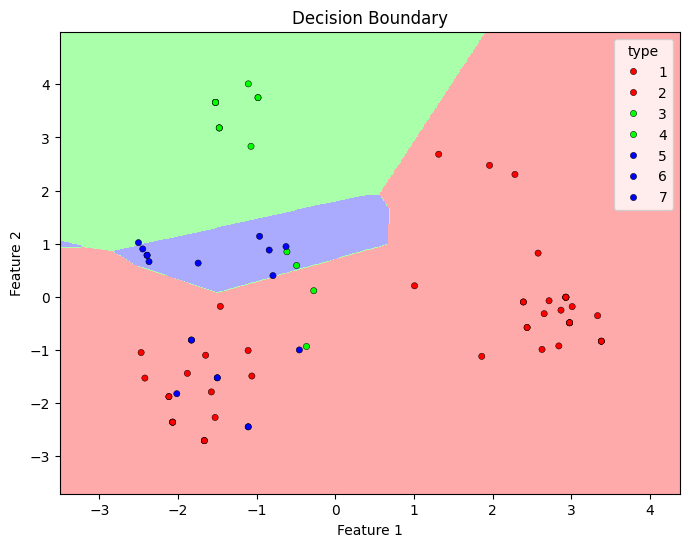

In [61]:
def plot_decision_boundary(X, y, clf, title="Decision Boundary", pca=None): # Add pca as an optional argument
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Define the meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # If PCA object is provided, transform the meshgrid before prediction
    if pca:
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_points = pca.inverse_transform(grid_points)  # Transform back to original feature space
        Z = clf.predict(grid_points)
    else:
        # Predict the class for each point in the meshgrid
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot the data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)  # Create a PCA object with 2 components
X_train_2d = pca.fit_transform(X_train)  # Fit and transform the training data

# Plot the decision boundary using the transformed data, and pass the PCA object
plot_decision_boundary(X_train_2d, y_train, knn_best, pca=pca)

Interview Questions:

1. What are the key hyperparameters in KNN?

k (Number of Neighbors): Number of nearest neighbors to consider.
Distance Metric: How distance is calculated (e.g., Euclidean, Manhattan).
Weights: Uniform or distance-based weighting of neighbors.
Algorithm: Brute force, KD-Tree, or Ball Tree.
p (for Minkowski Distance): Power parameter for distance calculation.




2. What distance metrics can be used in KNN?

. Euclidean Distance
. Manhattan Distance
. Minkowski Distance
. Hamming Distance
. Cosine Distance
. Chebyshev Distance
. Mahalanobis Distance

